In [3]:
!pip install imbalanced-learn

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix


### Load Data

In [5]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/vcf_with_labels.csv')
samples = df['samples']
df = df.drop(columns = ['samples', 'score'])
df.head(10)

label  chr22:16050408:T:C  chr22:16050612:C:G  chr22:16050678:C:T  \
0      0                   0                   1                   0   
1      1                   1                   1                   1   
2      0                   1                   1                   1   
3      0                   0                   0                   0   
4      0                   0                   1                   0   
5      1                   1                   1                   1   
6      0                   0                   0                   0   
7      1                   0                   0                   0   
8      1                   0                   0                   0   
9      1                   1                   1                   1   

   chr22:16050984:C:G  chr22:16051107:C:A  chr22:16051249:T:C  \
0                   0                   0                   0   
1                   0                   1                   1   
2                   0                   1                   1   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   1   
6                   0                   0                   0   
7                   0                   0                   1   
8                   0                   0                   0   
9                   0                   1                   1   

   chr22:16051347:G:C  chr22:16051453:A:C  chr22:16051477:C:A  \
0                   0                   0                   0   
1                   1                   1                   0   
2                   1                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   
5                   1                   1                   0   
6                   0                   0                   0   
7                   1                   1                   0   
8                   2                   0                   0   
9                   1                   1                   0   

   chr22:16051480:T:C  chr22:16051497:A:G  chr22:16051722:TA:T  \
0                   0                   0                    0   
1                   1                   1                    0   
2                   1                   1                    0   
3                   0                   1                    0   
4                   1                   1                    0   
5                   1                   1                    0   
6                   0                   0                    0   
7                   0                   1                    0   
8                   0                   2                    0   
9                   1                   1                    0   

   chr22:16051867:T:C  chr22:16051882:C:T  chr22:16052080:G:A  \
0                   0                   0                   1   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   0   
6                   0                   0                   1   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   1                   0   

   chr22:16052112:C:G  chr22:16052159:T:C  chr22:16052239:A:G  \
0                   0                   0                   1   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   1   
4         

### Split Train and Test Sets

In [20]:
target = df.label.values
Data = df.drop(columns = 'label').values
D_train, D_test, t_train, t_test = train_test_split(Data,
                                                    target,
                                                    test_size = 0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Orginal dataset shape:", df.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

Orginal dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)


### Build Model with Cross Validation

In [21]:
cv_method = RepeatedStratifiedKFold(n_splits=5,
                                     n_repeats=3,
                                    random_state=999)

In [22]:
scoring_metric = 'accuracy'

In [23]:
rf_classifier = RandomForestClassifier(random_state = 999)
rf_cv_results_full = cross_val_score(estimator=rf_classifier,
                                    X=D_test,
                                    y=t_test,
                                   cv=cv_method,
                                   scoring=scoring_metric)
rf_cv_results_full.mean().round(3)

0.58

### Feature Importance

In [24]:
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(D_train, t_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [25]:
best_features_rfi = df.columns[fs_indices_rfi].values
print('The top 10 features are:', ", ".join([str(i) for i in best_features_rfi]))

The top 10 features are: chr22:17770344:A:T, chr22:17712566:C:T, chr22:17741724:T:C, chr22:17725150:C:T, chr22:17718084:A:C, chr22:17791528:G:A, chr22:17722382:T:G, chr22:17743521:G:A, chr22:17722024:G:A, chr22:17788696:G:A


In [26]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print('The importance scores for the previous 10 features are:', ", ".join([str(round(i,4)) for i in feature_importances_rfi]))

The importance scores for the previous 10 features are: 0.0072, 0.0053, 0.0042, 0.0042, 0.0042, 0.0039, 0.0038, 0.0038, 0.0037, 0.0037


<ipython-input-27-d8def717c654>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


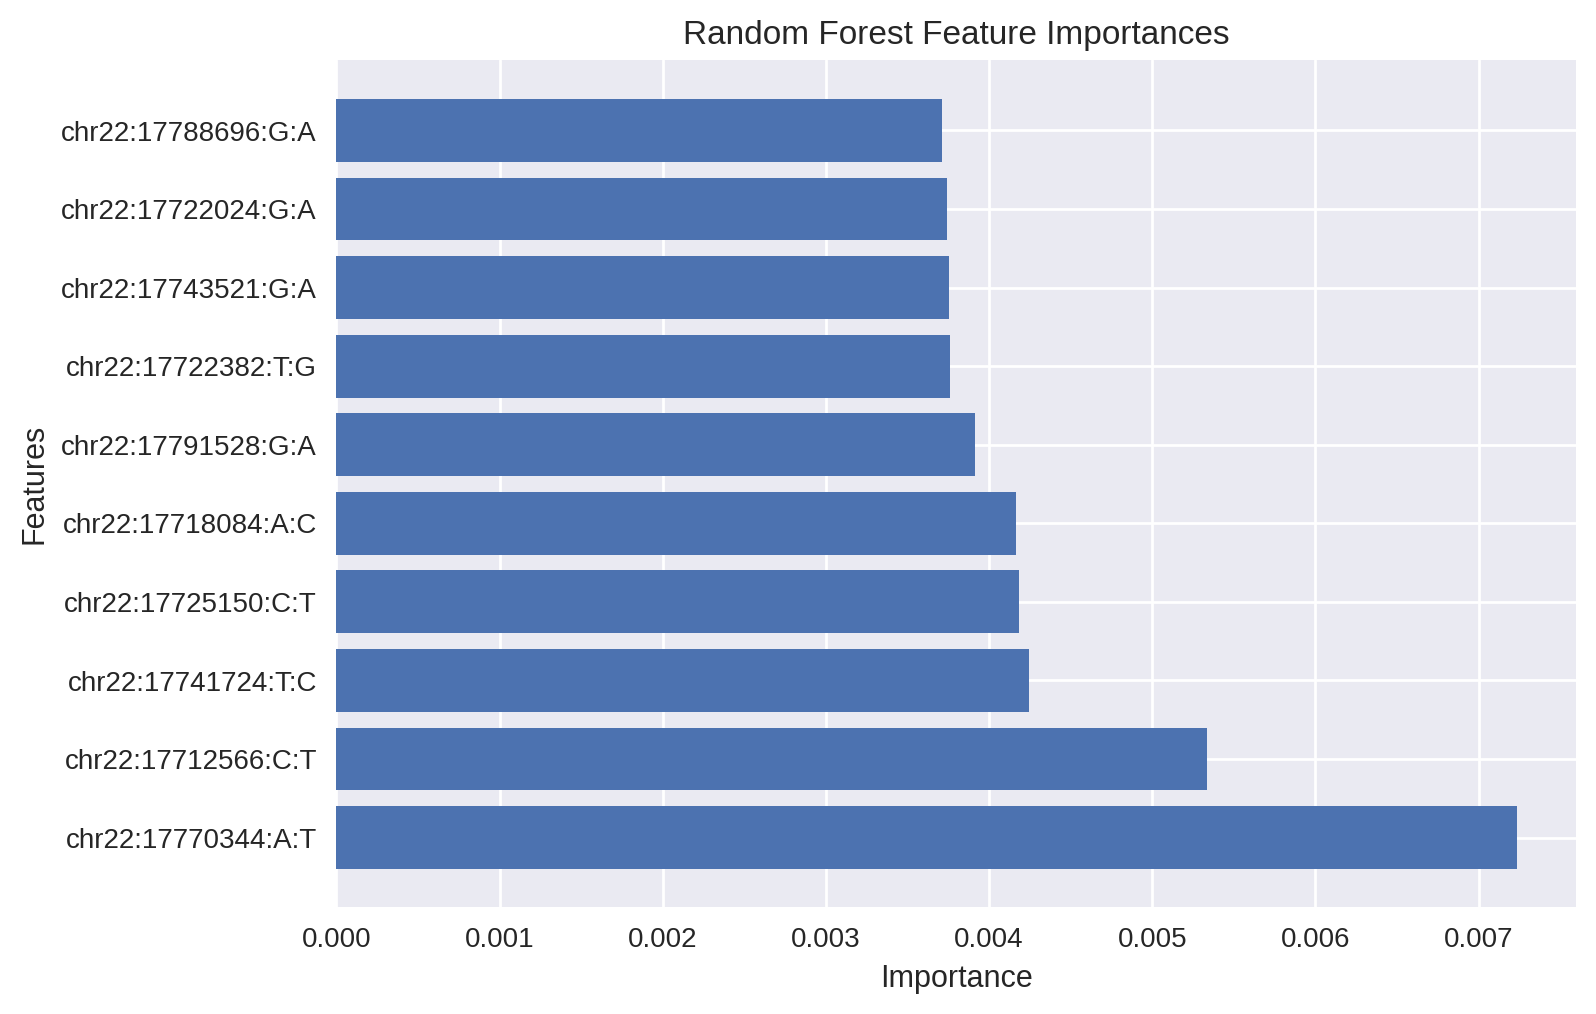

In [27]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

def plot_imp(best_features, scores, method_name):
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

### Grid Search for Hyperparameter Tuning

In [ ]:
params_RF = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 250, 500],
             'max_depth': [2,5,7,10,12]}

gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=cv_method,
                     verbose=1,
                     scoring='roc_auc')
gs_RF.fit(D_train,t_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


In [ ]:
print('The best parameters for Random Forest Classifier are: ', gs_RF.best_params_)

In [ ]:
print("The best score using area under the ROC curve metric is:", round(gs_RF.best_score_,3))

In [ ]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.nlargest(n=10, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

In [ ]:
rel_plot=sns.relplot(data=results_RF,
            x='max_depth',
            y='test_score',
           col='criterion',
           hue='n_estimators', style="n_estimators",
           kind='line')
rel_plot.axes[0,0].set_xlabel('Max depth')
rel_plot.axes[0,1].set_xlabel('Max depth')
rel_plot.axes[0,0].set_ylabel('Score')
rel_plot._legend.set_title("Number of\nestimators")
rel_plot._legend._legend_box.align="left"
rel_plot.fig.subplots_adjust(top=0.8)
rel_plot.fig.suptitle("Figure 3. Random forest performance")
plt.show(rel_plot)

### Model Based on Best Hyperparameters

In [ ]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                           criterion = results_RF['criterion'].iloc[0],
                          max_depth = results_RF['max_depth'].iloc[0])
rf.fit(D_train, t_train)
predictions = rf.predict(D_test)

In [ ]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [ ]:
pred_df.head(10)

In [ ]:
accuracy_score(t_test, predictions)

In [ ]:
print(classification_report(t_test, predictions))

In [ ]:
# Data Augmentation Here

### *mixup*: Per the Literature

In [6]:
def mixup_binary_data(X, y, alpha=0.2, lower=0, upper=2):
    # Arrays for augmented data
    new_X = []
    new_y = []

    for i in range(len(X)):
        # Pick two random observations
        idx1, idx2 = np.random.choice(len(X), 2, replace=False)

        # Create a lambda value based on Beta distribution for balanced mixing
        lam = np.random.beta(alpha, alpha)

        # Mix the two random samples based on the lambda value
        mixed_features = lam * X[idx1] + (1 - lam) * X[idx2]
        mixed_target = lam * y[idx1] + (1 - lam) * y[idx2]

        # Ensure the mixed feature values are within the valid range
        mixed_features = np.clip(mixed_features, lower, upper)

        # Append mixed data
        new_X.append(mixed_features)
        new_y.append(mixed_target)

    # Convert from Python list to np array
    mixed_X = np.array(new_X)
    mixed_y = np.array(new_y)

    return mixed_X, mixed_y

In [18]:
mixed_X, mixed_y = mixup_binary_data(D_train, t_train, alpha=0.2)

##### Random Forest Classification

In [19]:
# To keep it as a classification problem, make a .5 threshold for disease or no disease
mixed_y_binary = (mixed_y >= 0.5).astype(int)

In [ ]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                           criterion = results_RF['criterion'].iloc[0],
                          max_depth = results_RF['max_depth'].iloc[0])
rf.fit(mixed_X, mixed_y_binary)
predictions = rf.predict(D_test)

In [ ]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [ ]:
accuracy_score(t_test, predictions)

In [ ]:
print(classification_report(t_test, predictions))

##### Random Forest Regression

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Regression problem keeps the labels as mixup created them
regressor.fit(mixed_X, mixed_y)

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = regressor.predict(D_test)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

In [ ]:
predictions = (predictions >= 0.5).astype(int)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

### *mixup*: Change Features
What if feature values were -1, 0, and 1? Would that make the mixed features more symmetrical and less skewed towards no mutation?

In [ ]:
D_train_shift = np.where(D_train == 0, -1, np.where(D_train == 1, 0, 1))
D_test_shift = np.where(D_test == 0, -1, np.where(D_test == 1, 0, 1))

In [ ]:
mixed_X, mixed_y = mixup_binary_data(D_train_shift, t_train, alpha=0.2, lower=-1, upper=1)

##### Random Forest Classification

In [ ]:
mixed_y_binary = (mixed_y >= 0.5).astype(int)

In [ ]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                            criterion = results_RF['criterion'].iloc[0],
                            max_depth = results_RF['max_depth'].iloc[0])
rf.fit(mixed_X, mixed_y_binary)
predictions = rf.predict(D_test)

In [ ]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [ ]:
accuracy_score(t_test, predictions)

In [ ]:
print(classification_report(t_test, predictions))

##### Random Forest Regression

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(mixed_X, mixed_y)

In [ ]:
predictions = regressor.predict(D_test)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

In [ ]:
predictions = (predictions >= 0.5).astype(int)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

### Feature Stability
- Compare feature importance rankings of baseline and data augmented pipelines
- Measure permutations of multiple random forest runs. How much does ranking change over identical runs? Create confidence intervals

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting feature importances from the baseline model
baseline_full_importances = model_rfi.feature_importances_

# Extracting feature importances from the model trained on the mixed data (after first mixup)
augmented_feature_importances = rf.feature_importances_

# Validate that both baseline and augmented importances arrays have the same length
if len(baseline_full_importances) != len(augmented_feature_importances):
    raise ValueError("Importance arrays have different lengths!")

# Compute the difference in feature importances between baseline and augmented data
importance_difference = baseline_full_importances - augmented_feature_importances

# Sort features by the absolute value of the difference to get the features with the most significant differences
sorted_indices = np.argsort(np.abs(importance_difference))[::-1]
top_indices = sorted_indices[:num_features]

# Determine bar colors based on the sign of the difference:
# - Red indicates the feature importance is reduced in the augmented data
# - Blue indicates the feature importance is increased in the augmented data
colors = ["red" if diff < 0 else "blue" for diff in importance_difference[top_indices]]

# Plotting the differences for the top features
plt.barh(df.columns[top_indices], importance_difference[top_indices], color=colors)
plt.title('Difference in Feature Importances between Baseline and Augmented Data for Top Features')
plt.xlabel('Importance Difference')
plt.ylabel('Features')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Computes the mean and standard deviation of permutation importances across multiple runs.
def repeated_permutation_importance(model, X, y, n_repeats=30, random_state=None):
    rng = np.random.default_rng(seed=random_state)
    all_importances = np.array([permutation_importance(model, X, y, n_repeats=1, random_state=rng.integers(1e7)).importances_mean
                                for _ in range(n_repeats)])
    return all_importances.mean(axis=0), all_importances.std(axis=0)

# Extract the indices of the top N features based on their importance scores.
def get_top_n_features(mean_imp, n=10):
    return np.argsort(mean_imp)[-n:]

# Train a Random Forest classifier.
def train_rfi_classifier(D_train, t_train, n_estimators=100):

    return RandomForestClassifier(n_estimators=n_estimators).fit(D_train, t_train)

# Plot feature importances with confidence intervals.
def plot_feature_importances(feature_names, mean_imp_base_top, std_imp_base_top, mean_imp_aug_top, std_imp_aug_top):

    positions = np.arange(len(feature_names))
    bar_width = 0.4

    plt.figure(figsize=(12, 6))
    plt.barh(positions - bar_width/2, mean_imp_base_top, xerr=std_imp_base_top, height=bar_width, color='b', alpha=0.6, label='Baseline')
    plt.barh(positions + bar_width/2, mean_imp_aug_top, xerr=std_imp_aug_top, height=bar_width, color='r', alpha=0.6, label='Augmented')

    plt.title('Feature Importances with Confidence Intervals')
    plt.xlabel('Mean Importance')
    plt.ylabel('Features')
    plt.yticks(positions, feature_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Check if required data is available
required_vars = ['D_train', 't_train', 'mixed_X', 'mixed_y_binary', 'df']
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    raise ValueError(f"Required variables {', '.join(missing_vars)} are not defined!")

# Model training
model_rfi = train_rfi_classifier(D_train, t_train)

# Importance analysis
mean_imp_base, std_imp_base = repeated_permutation_importance(model_rfi, D_train, t_train, n_repeats=5)
mean_imp_aug, std_imp_aug = repeated_permutation_importance(model_rfi, mixed_X, mixed_y_binary, n_repeats=5)

# Extract top features
top_n = 10
best_features_rfi = list(set(get_top_n_features(mean_imp_base, top_n)).union(set(get_top_n_features(mean_imp_aug, top_n))))

# Filter importance values
mean_imp_base_top = mean_imp_base[best_features_rfi]
std_imp_base_top = std_imp_base[best_features_rfi]
mean_imp_aug_top = mean_imp_aug[best_features_rfi]
std_imp_aug_top = std_imp_aug[best_features_rfi]

# Extract feature names
feature_names = df.columns[best_features_rfi].tolist()

# Execute plotting function
plot_feature_importances(feature_names, mean_imp_base_top, std_imp_base_top, mean_imp_aug_top, std_imp_aug_top)

# Cross-Label Augmentation

In [7]:
target = df.label.values
Data = df.drop(columns = 'label').values
D_train, D_test, t_train, t_test = train_test_split(Data,
                                                    target,
                                                    test_size = 0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Orginal dataset shape:", df.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

Orginal dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)


**Here, we're defining a function that accepts a specified percentage of data augmentation and an alpha value as parameters. The function employs the mixup algorithm to perform data augmentation on a subset of rows based on the provided percentage.**

In [19]:
import numpy as np

def augmented_split_and_combine(D_train, t_train, augmentation_percentage, alpha):

    if augmentation_percentage!=0:

        num_samples = len(D_train)

        # Determine the number of samples to split for augmentation
        num_samples_to_augment = int(num_samples * augmentation_percentage)

        # Randomly select indices for the samples to augment
        augment_indices = np.random.choice(num_samples,
                                           num_samples_to_augment,
                                           replace=False)

        # Split the data into augmented and remaining portions
        D_augment = D_train[augment_indices]
        t_augment = t_train[augment_indices]

        D_remaining = np.delete(D_train,
                                augment_indices,
                                axis=0)

        t_remaining = np.delete(t_train,
                                augment_indices,
                                axis=0)

        # Perform data augmentation on the selected portion

        augmented_X, augmented_y = mixup_binary_data(D_augment,
                                                     t_augment,
                                                     alpha)

        augmented_y1 = (augmented_y >= 0.5).astype(int)

        # Combine augmented data with remaining data

        combined_X = np.vstack((D_remaining,
                                augmented_X))

        combined_y = np.concatenate((t_remaining,
                                     augmented_y1))

    else:
        combined_X = D_train
        combined_y = t_train

    return combined_X, combined_y


In [ ]:
# Creating a empty dictionary to store the values
final_results = {"augmentation_percentage":[],
      "alpha":[],
      "Type_I_error":[],
      "Type_II_error":[],
      "acuracy":[]}

# Creating a function to apply different level of data augmentation with different value of alpha and augmentation level
def rf_experiment(D_train,
                  D_test,
                  t_train,
                  t_test,
                  augmentation_percentage,
                  alpha):

    augmentation_percentage = augmentation_percentage

    alpha = alpha

    # getting augmented data with a level of augmentation
    combined_X, combined_y = augmented_split_and_combine(D_train,
                                                         t_train,
                                                         augmentation_percentage,
                                                         alpha)


    cv_methods = RepeatedStratifiedKFold(n_splits=5,
                                     n_repeats=3,
                                    random_state=999)
    scoring  = "roc_auc"

    params_RF = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 250, 300],
             'max_depth': [2,5,7,10,12]}

    # Random forest instance

    rf_model = RandomForestClassifier(random_state = 999)

    RF_GridSearch = GridSearchCV(estimator=rf_model,
                     param_grid=params_RF,
                     cv=cv_methods,
                     verbose=1,
                     scoring=scoring)

    # train the model on augmented data
    RF_GridSearch.fit(combined_X, combined_y)

    #predicting label value on test data
    RF_pred = RF_GridSearch.predict(D_test)

    confusion = confusion_matrix(t_test, RF_pred)

    TN, FP, FN, TP = confusion.ravel()

    Type_I_error = FP / (FP + TN)

    Type_II_error = FN / (FN + TP)

    report_dict = classification_report(t_test,
                                        RF_pred,
                                        output_dict=True)

    accuracy = report_dict['accuracy']

    final_results['augmentation_percentage'].append(augmentation_percentage)
    final_results['alpha'].append(alpha)
    final_results['Type_I_error'].append(Type_I_error)
    final_results['Type_II_error'].append(Type_II_error)
    final_results["acuracy"].append(accuracy)

In [ ]:
augmentation_percentages = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
alphas = [0.2,0.3,0.4]

for augmentation_percentage in augmentation_percentages:
    for alpha in alphas:
        results = rf_experiment(D_train, D_test, t_train, t_test, augmentation_percentage, alpha)

In [ ]:
final_results

In [ ]:
import matplotlib.pyplot as plt

def polter(result_dictionary):
    # Group the results by 'alpha'
    grouped_results = {}
    for i in range(len(result_dictionary['augmentation_percentage'])):
        ap = result_dictionary['augmentation_percentage'][i]
        alpha = result_dictionary['alpha'][i]
        Type_I_error = result_dictionary['Type_I_error'][i]
        Type_II_error = result_dictionary['Type_II_error'][i]
        accuracy = result_dictionary['acuracy'][i]
        if alpha not in grouped_results:
            grouped_results[alpha] = {'augmentation_levels': [], 'Type_I_errors': [], 'Type_II_errors': [], 'accuracies': []}

        grouped_results[alpha]['augmentation_levels'].append(ap)
        grouped_results[alpha]['Type_I_errors'].append(Type_I_error)
        grouped_results[alpha]['Type_II_errors'].append(Type_II_error)
        grouped_results[alpha]['accuracies'].append(accuracy)

    # Create separate graphs for each metric
    for metric_name, y_label in [('Type_I_errors', 'Type I Errors'),
                                 ('Type_II_errors', 'Type II Errors'),
                                 ('accuracies', 'Accuracy')]:
        plt.style.use('ggplot')
        plt.figure(figsize=(8, 6))
        for alpha, data in grouped_results.items():
            augmentation_levels = data['augmentation_levels']
            metric_values = data[metric_name]
            plt.plot(augmentation_levels, metric_values, label=f'Alpha {alpha}')
        plt.xlabel('Augmentation Level')
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs. Augmentation Level for Different Alpha Values')
        plt.legend()
        plt.grid(True)

        # Set x-axis ticks and labels
        augmentation_ticks = sorted(list(set(augmentation_levels)))  # Get unique augmentation levels
        plt.xticks(augmentation_ticks)

    plt.tight_layout()
    plt.show()


polter(final_results)

#OverSampling Augmentation Technique

In [9]:
# Initialize the SMOTE object
smote = SMOTE(random_state=999)

# Fit and apply the transform
D_train_over, t_train_over = smote.fit_resample(D_train, t_train)

# Checking shapes after oversampling
print("Features training dataset shape after oversampling:", D_train_over.shape)
print("Target training dataset shape after oversampling:", t_train_over.shape)

Features training dataset shape after oversampling: (860, 1988)
Target training dataset shape after oversampling: (860,)


###Analysis of Data Before and After Oversampling using Visualisation

In [10]:
def plot_class_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.bar(unique, counts)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(unique)
    plt.show()

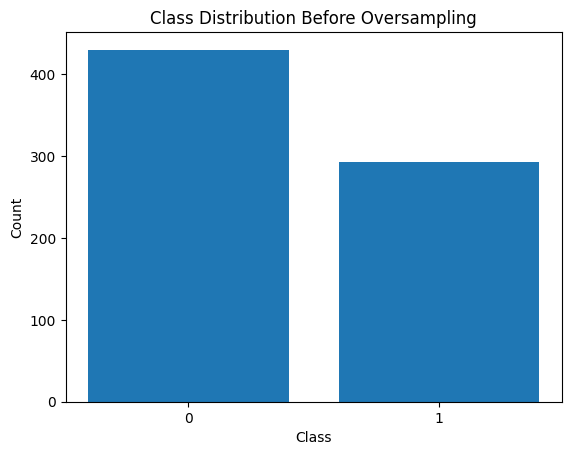

In [11]:
# Before oversampling

plot_class_distribution(t_train, 'Class Distribution Before Oversampling')

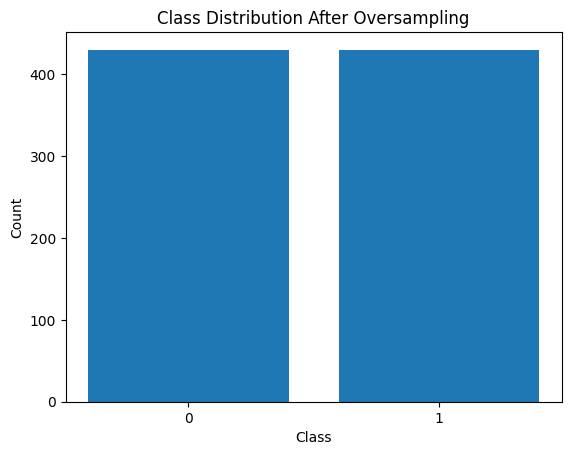

In [12]:
# After oversampling

plot_class_distribution(t_train_over, 'Class Distribution After Oversampling')

Here, we're defining a function that accepts a specified percentage of data augmentation and an alpha value as parameters. The function employs the mixup algorithm to perform data augmentation on a subset of rows based on the provided percentage.

In [13]:
import numpy as np

def augmented_split_and_combine(D_train, t_train, augmentation_percentage, alpha):

    if augmentation_percentage!=0:

        num_samples = len(D_train)

        # Determine the number of samples to split for augmentation
        num_samples_to_augment = int(num_samples * augmentation_percentage)

        # Randomly select indices for the samples to augment
        augment_indices = np.random.choice(num_samples,
                                           num_samples_to_augment,
                                           replace=False)

        # Split the data into augmented and remaining portions
        D_augment = D_train[augment_indices]
        t_augment = t_train[augment_indices]

        D_remaining = np.delete(D_train,
                                augment_indices,
                                axis=0)

        t_remaining = np.delete(t_train,
                                augment_indices,
                                axis=0)

        # Perform data augmentation on the selected portion

        augmented_X, augmented_y = mixup_binary_data(D_augment,
                                                     t_augment,
                                                     alpha)

        augmented_y1 = (augmented_y >= 0.5).astype(int)

        # Combine augmented data with remaining data

        combined_X = np.vstack((D_remaining,
                                augmented_X))

        combined_y = np.concatenate((t_remaining,
                                     augmented_y1))

    else:
        combined_X = D_train
        combined_y = t_train

    return combined_X, combined_y


In [14]:
# Creating a empty dictionary to store the values
final_results = {"augmentation_percentage":[],
      "alpha":[],
      "Type_I_error":[],
      "Type_II_error":[],
      "acuracy":[]}

# Creating a function to apply different level of data augmentation with different value of alpha and augmentation level
def rf_experiment(D_train,
                  D_test,
                  t_train,
                  t_test,
                  augmentation_percentage,
                  alpha):

    augmentation_percentage = augmentation_percentage

    alpha = alpha

    # getting augmented data with a level of augmentation
    combined_X, combined_y = augmented_split_and_combine(D_train,
                                                         t_train,
                                                         augmentation_percentage,
                                                         alpha)


    cv_methods = RepeatedStratifiedKFold(n_splits=5,
                                     n_repeats=3,
                                    random_state=999)
    scoring  = "roc_auc"

    params_RF = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 250, 300],
             'max_depth': [2,5,7,10,12]}

    # Random forest instance

    rf_model = RandomForestClassifier(random_state = 999)

    RF_GridSearch = GridSearchCV(estimator=rf_model,
                     param_grid=params_RF,
                     cv=cv_methods,
                     verbose=1,
                     scoring=scoring)

    # train the model on augmented data
    RF_GridSearch.fit(combined_X, combined_y)

    #predicting label value on test data
    RF_pred = RF_GridSearch.predict(D_test)

    confusion = confusion_matrix(t_test, RF_pred)

    TN, FP, FN, TP = confusion.ravel()

    Type_I_error = FP / (FP + TN)

    Type_II_error = FN / (FN + TP)

    report_dict = classification_report(t_test,
                                        RF_pred,
                                        output_dict=True)

    accuracy = report_dict['accuracy']

    final_results['augmentation_percentage'].append(augmentation_percentage)
    final_results['alpha'].append(alpha)
    final_results['Type_I_error'].append(Type_I_error)
    final_results['Type_II_error'].append(Type_II_error)
    final_results["acuracy"].append(accuracy)

In [ ]:
augmentation_percentages = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
alphas = [0.2,0.3,0.4]

for augmentation_percentage in augmentation_percentages:
    for alpha in alphas:
        results = rf_experiment(D_train_over, D_test, t_train_over, t_test, augmentation_percentage, alpha)

In [16]:
final_results

{'augmentation_percentage': [0.2,
  0.2,
  0.2,
  0.3,
  0.3,
  0.3,
  0.4,
  0.4,
  0.4,
  0.5,
  0.5,
  0.5,
  0.6,
  0.6,
  0.6,
  0.7,
  0.7,
  0.7,
  0.8,
  0.8,
  0.8,
  0.9,
  0.9,
  0.9],
 'alpha': [0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4,
  0.2,
  0.3,
  0.4],
 'Type_I_error': [0.31891891891891894,
  0.32972972972972975,
  0.31891891891891894,
  0.4,
  0.34054054054054056,
  0.32972972972972975,
  0.33513513513513515,
  0.3675675675675676,
  0.35135135135135137,
  0.34594594594594597,
  0.32432432432432434,
  0.3081081081081081,
  0.3567567567567568,
  0.3081081081081081,
  0.3675675675675676,
  0.35135135135135137,
  0.2918918918918919,
  0.3621621621621622,
  0.2810810810810811,
  0.22702702702702704,
  0.34054054054054056,
  0.22702702702702704,
  0.32972972972972975,
  0.372972972972973],
 'Type_II_error': [0.56,
  0.592,
  0.616,
  0.52,
  0.576,
  0.6,
  0.536,
  0.504

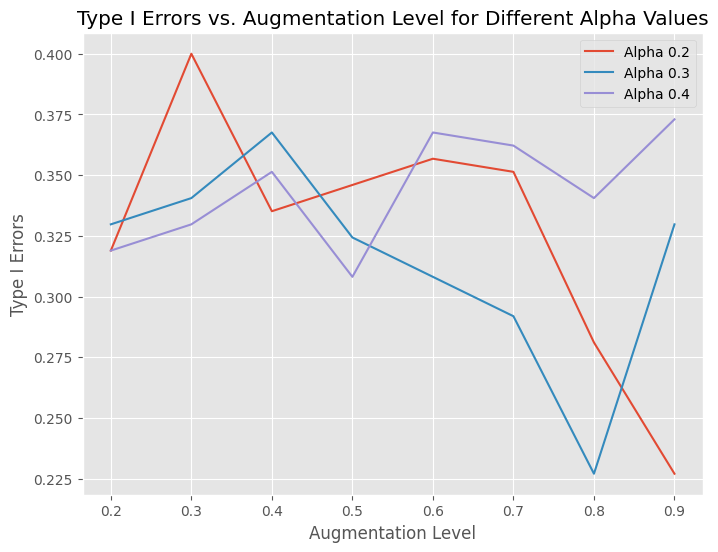

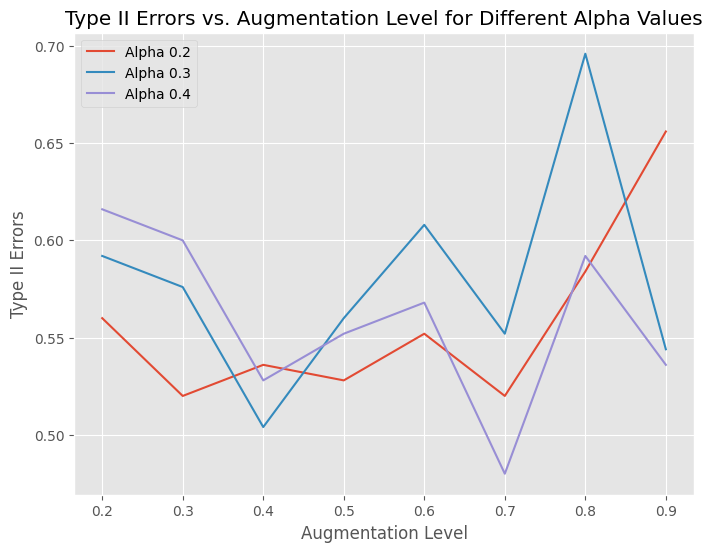

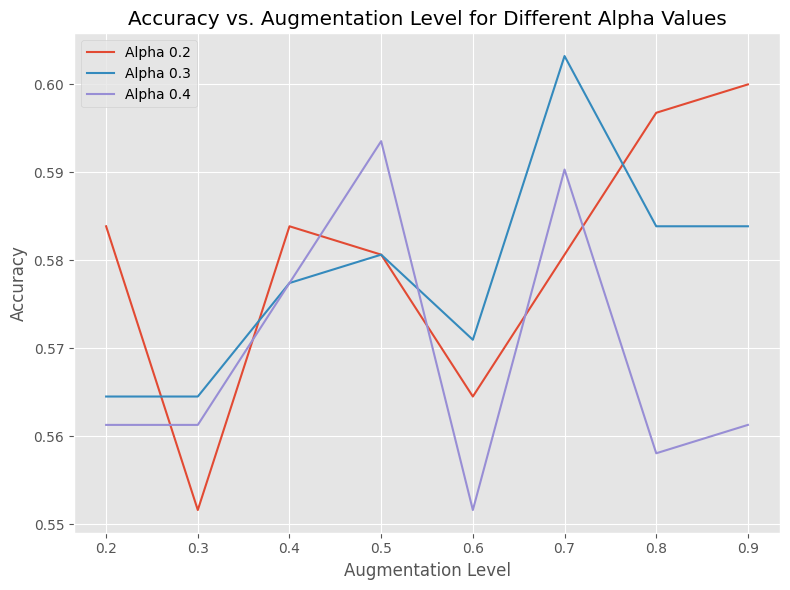

In [17]:
import matplotlib.pyplot as plt

def polter(result_dictionary):
    # Group the results by 'alpha'
    grouped_results = {}
    for i in range(len(result_dictionary['augmentation_percentage'])):
        ap = result_dictionary['augmentation_percentage'][i]
        alpha = result_dictionary['alpha'][i]
        Type_I_error = result_dictionary['Type_I_error'][i]
        Type_II_error = result_dictionary['Type_II_error'][i]
        accuracy = result_dictionary['acuracy'][i]
        if alpha not in grouped_results:
            grouped_results[alpha] = {'augmentation_levels': [], 'Type_I_errors': [], 'Type_II_errors': [], 'accuracies': []}

        grouped_results[alpha]['augmentation_levels'].append(ap)
        grouped_results[alpha]['Type_I_errors'].append(Type_I_error)
        grouped_results[alpha]['Type_II_errors'].append(Type_II_error)
        grouped_results[alpha]['accuracies'].append(accuracy)

    # Create separate graphs for each metric
    for metric_name, y_label in [('Type_I_errors', 'Type I Errors'),
                                 ('Type_II_errors', 'Type II Errors'),
                                 ('accuracies', 'Accuracy')]:
        plt.style.use('ggplot')
        plt.figure(figsize=(8, 6))
        for alpha, data in grouped_results.items():
            augmentation_levels = data['augmentation_levels']
            metric_values = data[metric_name]
            plt.plot(augmentation_levels, metric_values, label=f'Alpha {alpha}')
        plt.xlabel('Augmentation Level')
        plt.ylabel(y_label)
        plt.title(f'{y_label} vs. Augmentation Level for Different Alpha Values')
        plt.legend()
        plt.grid(True)

        # Set x-axis ticks and labels
        augmentation_ticks = sorted(list(set(augmentation_levels)))  # Get unique augmentation levels
        plt.xticks(augmentation_ticks)

    plt.tight_layout()
    plt.show()


polter(final_results)

#Adaptive Synthetic Sampling Technique

Like SMOTE, ADASYN generates synthetic examples. However, ADASYN places an emphasis on generating samples next to the original samples which are wrongly classified using a K-Nearest Neighbors classifier.

In [20]:
# Required Libraries
from imblearn.over_sampling import ADASYN

# Loading the dataset
target = df.label.values
Data = df.drop(columns='label').values

# Splitting the data
D_train, D_test, t_train, t_test = train_test_split(Data,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Original dataset shape:", df.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

# Applying ADASYN
adasyn = ADASYN(random_state=999)
D_train_adasyn, t_train_adasyn = adasyn.fit_resample(D_train, t_train)

# Checking shapes after oversampling with ADASYN
print("\nAfter ADASYN Oversampling:")
print("Features training dataset shape after oversampling:", D_train_adasyn.shape)
print("Target training dataset shape after oversampling:", t_train_adasyn.shape)

Original dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)

After ADASYN Oversampling:
Features training dataset shape after oversampling: (891, 1988)
Target training dataset shape after oversampling: (891,)


###Class Distribution Before and After ADASYN

First set of plots shows the count of each class before and after applying ADASYN. The second plot should give a more balanced distribution.

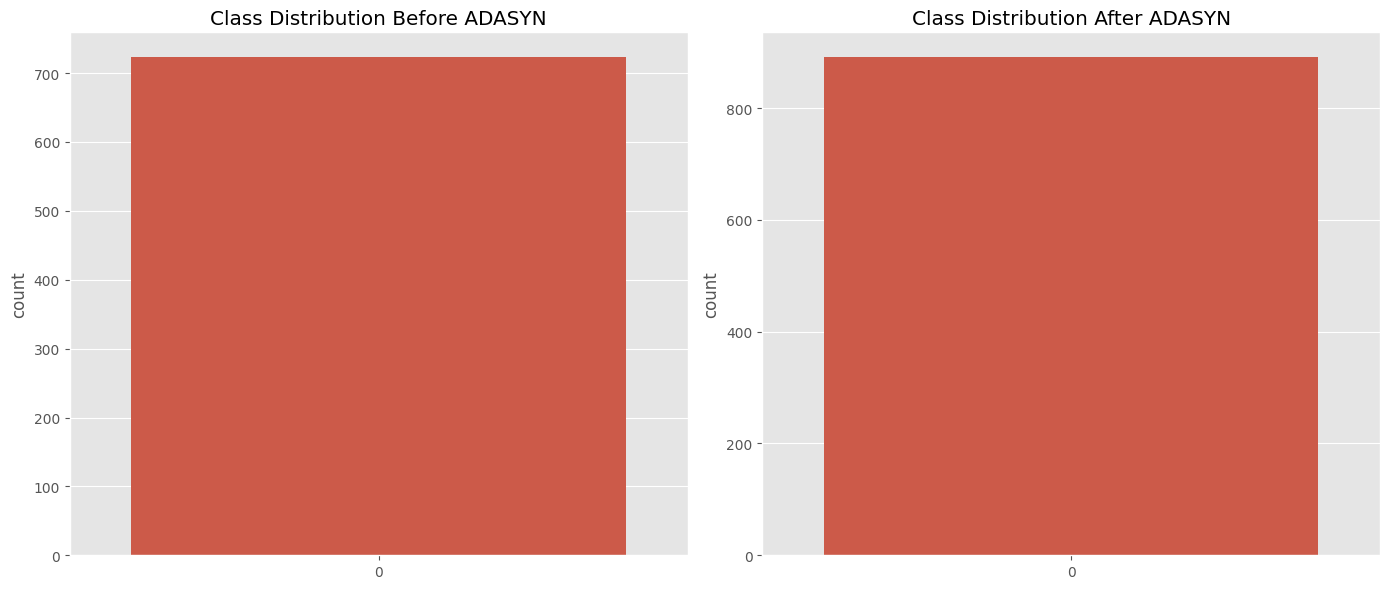

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(t_train)
plt.title('Class Distribution Before ADASYN')

plt.subplot(1, 2, 2)
sns.countplot(t_train_adasyn)
plt.title('Class Distribution After ADASYN')

plt.tight_layout()
plt.show()

###Feature Distribution for a particular feature (e.g., feature at index 0)


The second set of plots visualizes the distribution of values for the first feature (as an example) in the dataset, before and after oversampling. This provides a sense of how ADASYN might be affecting the feature distributions.

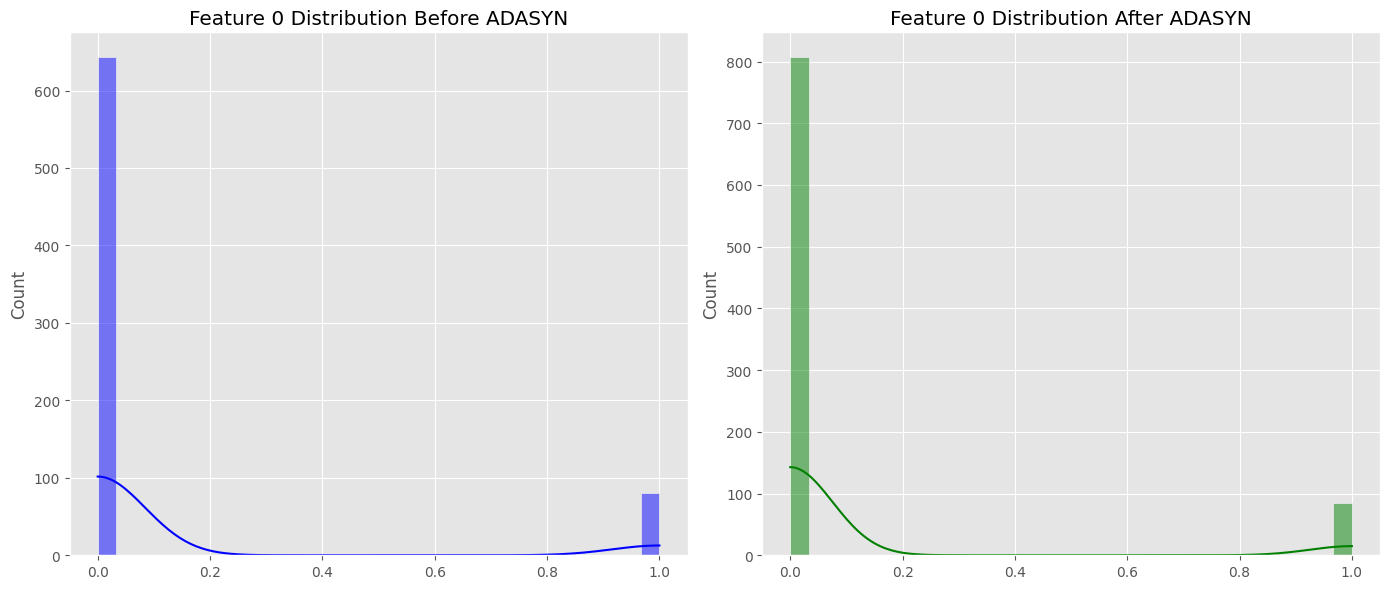

In [23]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(D_train[:, 0], kde=True, bins=30, color='blue')
plt.title('Feature 0 Distribution Before ADASYN')

plt.subplot(1, 2, 2)
sns.histplot(D_train_adasyn[:, 0], kde=True, bins=30, color='green')
plt.title('Feature 0 Distribution After ADASYN')

plt.tight_layout()
plt.show()

# Noise Injection

It is a data augmentation technique where random noise is added to the samples, creating variations of the original data. This can sometimes help in improving the generalization capability of certain models, especially when the amount of available data is limited.

>Gaussian Noise: The most common type of noise added to data. It's based on the normal distribution.

>Uniform Noise: Noise that has a constant probability.

>Salt-and-Pepper Noise: Randomly replacing parts of the image with black or white pixels.

In [24]:
# Add Gaussian Noise to data
def add_gaussian_noise(data, mean=0, std_dev=0.05):
    noise = np.random.normal(mean, std_dev, data.shape)
    return data + noise

# Add Uniform Noise to data
def add_uniform_noise(data, low=-0.05, high=0.05):
    noise = np.random.uniform(low, high, data.shape)
    return data + noise

# Apply Gaussian noise
D_train_gaussian = add_gaussian_noise(D_train)

# Apply Uniform noise
D_train_uniform = add_uniform_noise(D_train)

The above code shows how the distribution of a single feature (in this example, the feature at index 0) changes when Gaussian or Uniform noise is added. We can observe the changes and decide which type of noise might be more suitable for our specific use-case.

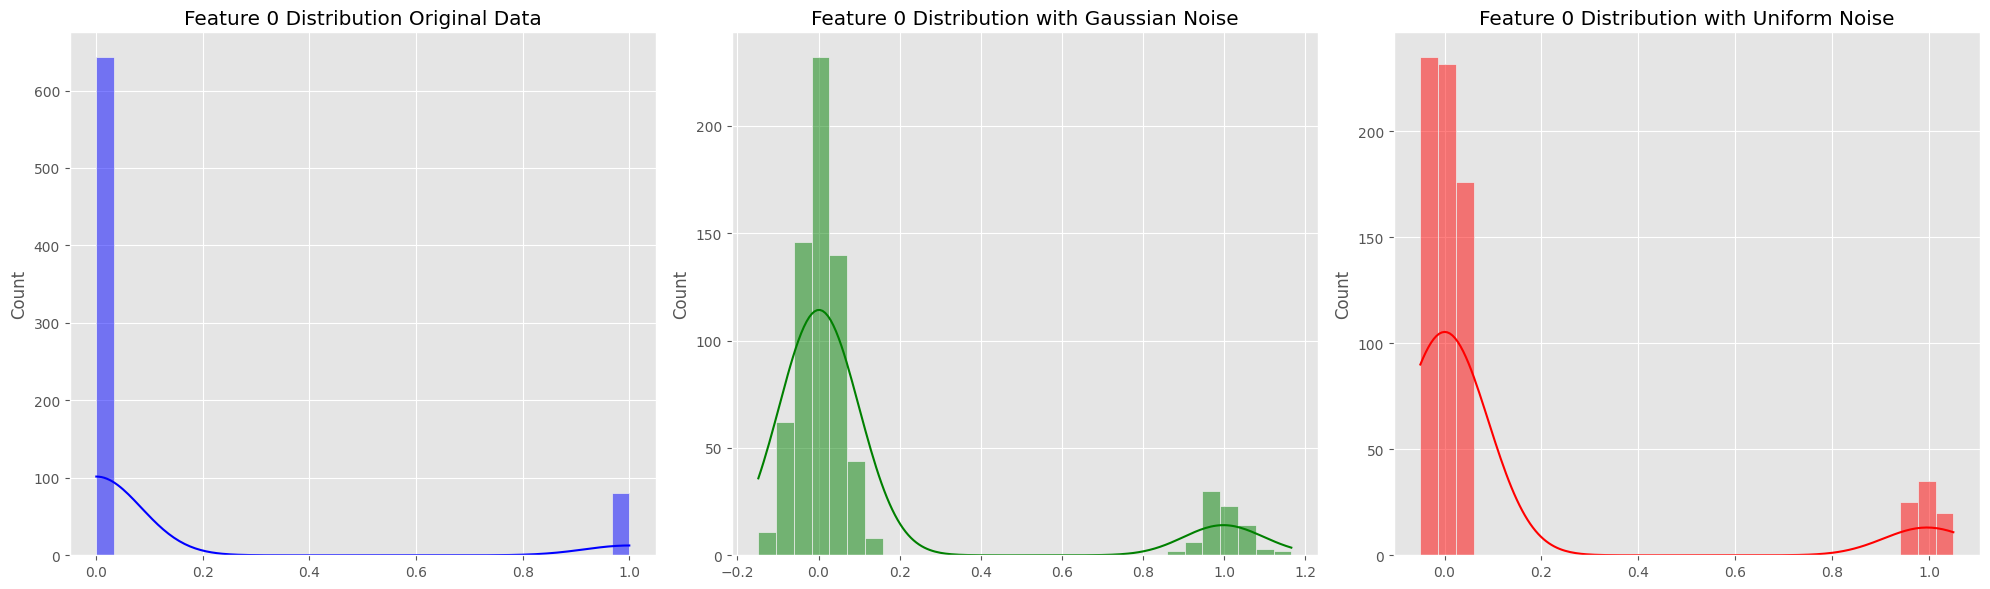

In [32]:
# For a particular feature, e.g., feature at index 0
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.histplot(D_train[:, 0], kde=True, bins=30, color='blue')
plt.title('Feature 0 Distribution Original Data')

plt.subplot(1, 3, 2)
sns.histplot(D_train_gaussian[:, 0], kde=True, bins=30, color='green')
plt.title('Feature 0 Distribution with Gaussian Noise')

plt.subplot(1, 3, 3)
sns.histplot(D_train_uniform[:, 0], kde=True, bins=30, color='red')
plt.title('Feature 0 Distribution with Uniform Noise')

plt.tight_layout()
plt.show()

# Random Sampling with Replacement Technique

Random under-sampling and over-sampling are two of the most basic techniques for dealing with imbalanced datasets. Here's a brief overview:

>Random Under-Sampling: This method reduces the number of instances from the over-represented class in the dataset. Although it can help balance out the classes, the main disadvantage is that we might lose potentially significant data.

>Random Over-Sampling: In this method, we duplicate random instances of the under-represented class in the dataset. The drawback here is that it can make our model more prone to overfitting since it is just replicating the instances.

###Random Under-Sampling

In [37]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=999)
D_train_under, t_train_under = rus.fit_resample(D_train, t_train)

print("Features training dataset shape after under-sampling:", D_train_under.shape)
print("Target training dataset shape after under-sampling:", t_train_under.shape)

Features training dataset shape after under-sampling: (586, 1988)
Target training dataset shape after under-sampling: (586,)


###Random Over-Sampling


In [38]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=999)
D_train_over, t_train_over = ros.fit_resample(D_train, t_train)

print("Features training dataset shape after over-sampling:", D_train_over.shape)
print("Target training dataset shape after over-sampling:", t_train_over.shape)

Features training dataset shape after over-sampling: (860, 1988)
Target training dataset shape after over-sampling: (860,)


This code will provide with bar plots showing the number of instances for each class in the training dataset before and after under-sampling and over-sampling.

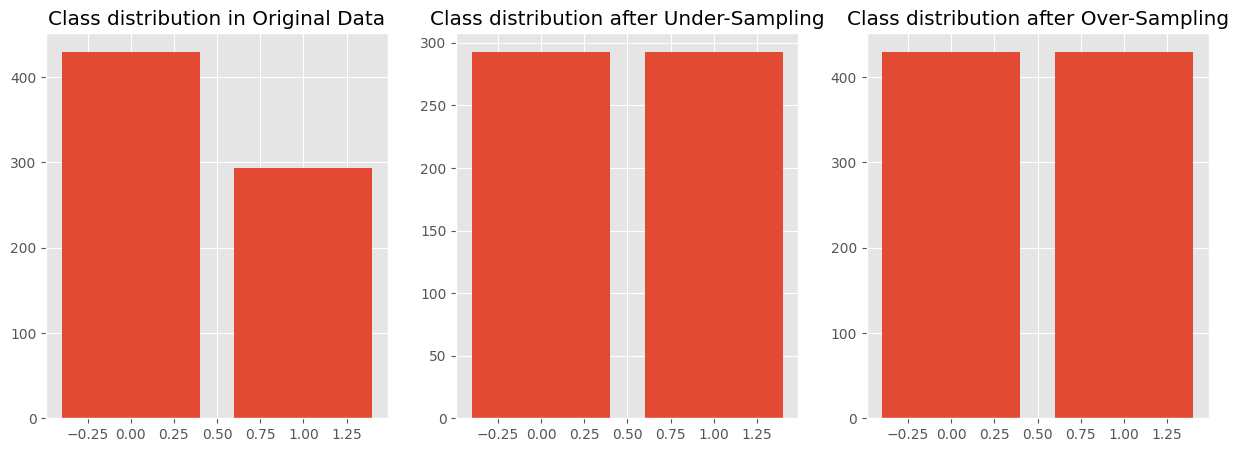

In [39]:
# Original class distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(*np.unique(t_train, return_counts=True))
plt.title('Class distribution in Original Data')

# After Under-Sampling
plt.subplot(1, 3, 2)
plt.bar(*np.unique(t_train_under, return_counts=True))
plt.title('Class distribution after Under-Sampling')

# After Over-Sampling
plt.subplot(1, 3, 3)
plt.bar(*np.unique(t_train_over, return_counts=True))
plt.title('Class distribution after Over-Sampling')

plt.show()

#Feature Space Augmentation Technique

It is a technique that involves creating new features by combining or transforming existing features.
The idea is to expand the feature space in a manner that can potentially make the classification problem easier for ML models. When combined with data augmentation, it can also help in reducing overfitting.

>Polynomial Features: Create new features that are polynomial combinations of the original features.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Apply PCA on the original data to reduce its dimensionality
pca_initial = PCA(n_components=50)  # Taking top 50 components
D_train_reduced = pca_initial.fit_transform(D_train)

# Create a Polynomial feature object of degree 2
poly = PolynomialFeatures(degree=2)

# Apply polynomial features to the reduced dataset
D_train_poly = poly.fit_transform(D_train_reduced)

print("Original reduced feature space:", D_train_reduced.shape)
print("Feature space after polynomial augmentation:", D_train_poly.shape)

Original reduced feature space: (723, 50)
Feature space after polynomial augmentation: (723, 1326)


The below code takes the original dataset and a version of it augmented with polynomial features, and then visualizes both in a 2-dimensional space using PCA. The purpose is to compare the spread and distribution of the original data with its polynomial-augmented version.

>PCA is employed to reduce both datasets to two dimensions for visualization purposes.

>Original Data: The data is transformed into a 2D representation using PCA that was initially fit on it.

>Polynomial Augmented Data: The polynomial-augmented dataset is also transformed into a 2D representation using a separate PCA instance.

>Visualization: Two side-by-side scatter plots are created. The left plot shows the original data in 2D, and the right plot shows the polynomial-augmented data in 2D. The colors of the data points represent different target classes, allowing for a visual comparison of class distribution in both datasets.

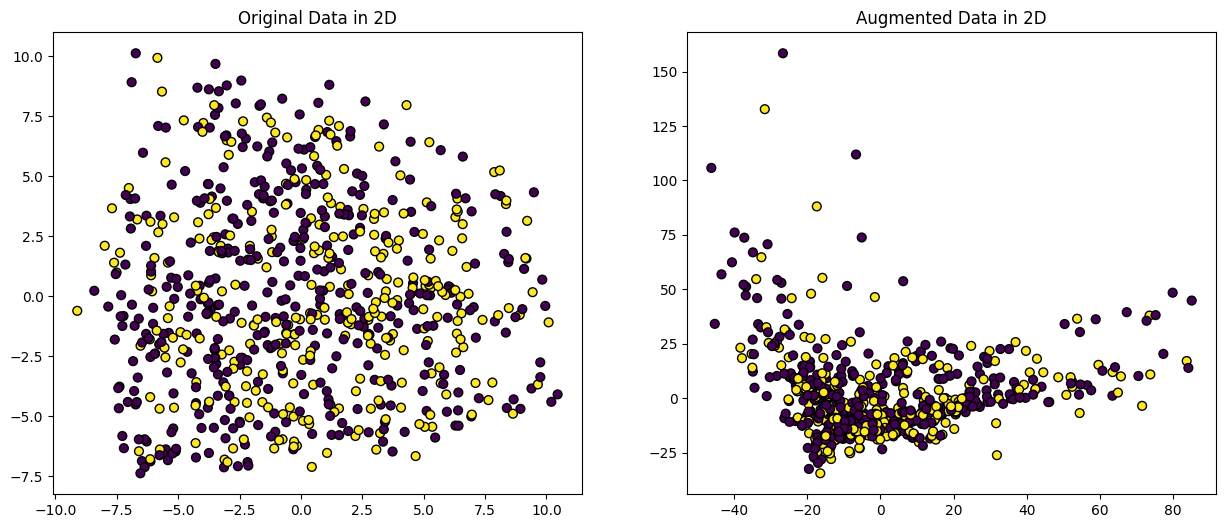

In [9]:
# For visualization purposes, applying PCA again to bring the polynomial-augmented data to 2D
pca_poly = PCA(n_components=2)
D_train_2D = pca_initial.transform(D_train)  # Transform original data to 2D
D_train_poly_2D = pca_poly.fit_transform(D_train_poly)  # Transform polynomial data to 2D

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(D_train_2D[:, 0], D_train_2D[:, 1], c=t_train, edgecolor='k', s=40)
plt.title("Original Data in 2D")

plt.subplot(1, 2, 2)
plt.scatter(D_train_poly_2D[:, 0], D_train_poly_2D[:, 1], c=t_train, edgecolor='k', s=40)
plt.title("Augmented Data in 2D")

plt.show()